# 2.1 $\quad$ Generación de carteras

## 1. Rentabilidad y volatilidad de una cartera con dos activos

Una cartera de activos define una colección de activos financieros, como acciones, bonos y otros instrumentos de inversión. La composición de la cartera se determina con el objetivo de alcanzar una meta financiera específica, como maximizar el rendimiento, minimizar el riesgo o encontrar cierto equilibrio entre ambos. La gestión de carteras implica la toma de decisiones estratégicas sobre la asignación de activos, la diversificación y el ajuste periódico para adaptarse a los posibles cambios en las condiciones del mercado.

Definir una cartera de activos implica especificar los diferentes instrumentos financieros o activos que la componen y la proporción en la que se invierte en cada uno. Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$.

   Debe cumplirse que $w_1 + w_2 = 1.0$ ya que representa el 100% de la inversión.


* $\bar R_p$ a la rentabilidad media o esperanza de la cartera

$$ \bar R_p=w_1 \bar R_1 + w_2 \bar R_2$$.

Es una suma ponderada de la rentabilidad de cada activo por el porcentaje de inversión $w_i$ en cada activo.

* Varianza $$\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_{12}$$

 siendo:

 $$\quad \sigma_{12} = \rho_{12} \sigma_1 \sigma_2$$


 donde $\rho_{12}$ es el coeficiente de correlación entre los activos 1 y 2.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_std_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [ ]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [ ]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [ ]:
# definimos una cartera con dos activos
ret1 = 0.2  # retornos esperados del activo 1
ret2 = 0.1  # retornos esperados del activo 2

std1 = 0.25  # volatilidad del activo 1
std2 = 0.15  # volatilidad del activo 2



---

### Caso 1:  
$\quad \rho_{12} = 1$

* Si $\rho_{12} = 1$ se dice que los activos son **perfectamente positivamente** correlacionados.

    - No hay beneficios de diversificación.

    - La rentabilidad de la cartera es igual a la suma ponderada de las rentabilidades de los activos.
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 + w_2 \sigma_2$

In [ ]:
# definimos el coeficiente de correlación
coef_corr = 1

Vamos a ir variando los pesos de los dos activos y ver cómo se comporta la rentabilidad y la volatilidad de la cartera.

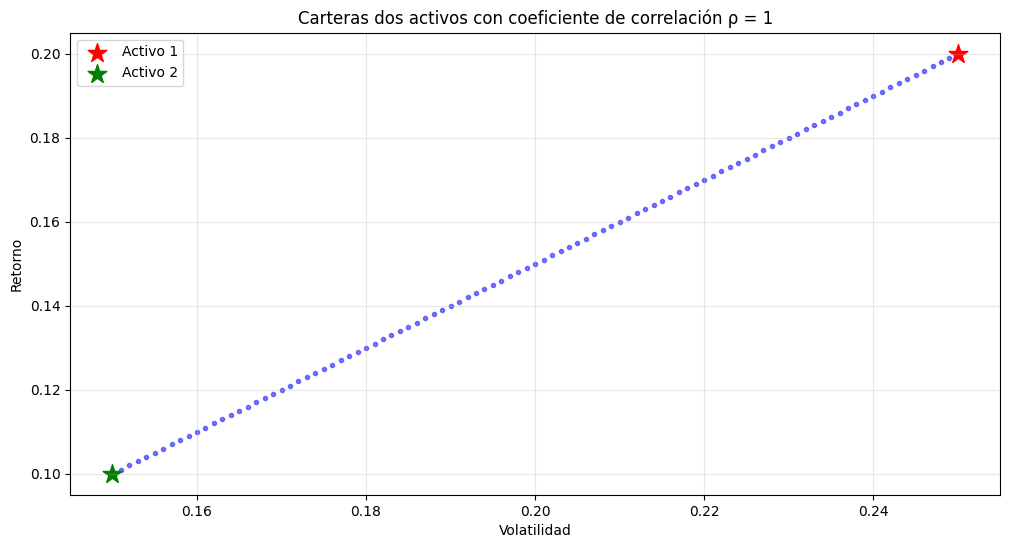

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

pesos = np.linspace(
    0, 1, 101
)  # generamos 100 puntos entre 0 y 1 que representan los pesos del activo 1

for w in pesos:
    # Peso activo 1
    w1 = w
    # Peso activo 2
    w2 = 1 - w
    # calculamos el retorno de la cartera para cada peso
    retw = calc_ret_cartera(w1=w1, w2=w2, r1=ret1, r2=ret2)
    # calculamos la volatilidad de la cartera para cada peso
    stdw = calc_std_cartera(w1=w1, w2=w2, std1=std1, std2=std2, rho=coef_corr)
    plt.scatter(
            stdw, retw, marker=".", color="blue", alpha=0.5
        )  # marcamos el resto de puntos

plt.scatter(
    std1, ret1, color="red", marker="*", s=200, label="Activo 1"
)  # marcamos el punto del activo 1
plt.scatter(
    std2, ret2, color="green", marker="*", s=200, label="Activo 2"
)  # marcamos el punto del activo 2

plt.xlabel("Volatilidad")
plt.ylabel("Retorno")
plt.title("Carteras dos activos con coeficiente de correlación \u03C1 = 1")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

---

### Caso 2:  
$\quad \rho_{12} = -1$

* Si $\rho_{12} = -1$ se dice que los activos son **perfectamente pero negativamente** correlacionados.

    - Hay máximos beneficios de diversificación.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = |w_1 \sigma_1 - w_2 \sigma_2| \quad $    OJO: valor absoluto porque el resultado debe ser positivo
        



In [ ]:
# definimos el coeficiente de correlación
coef_corr_neg = -1

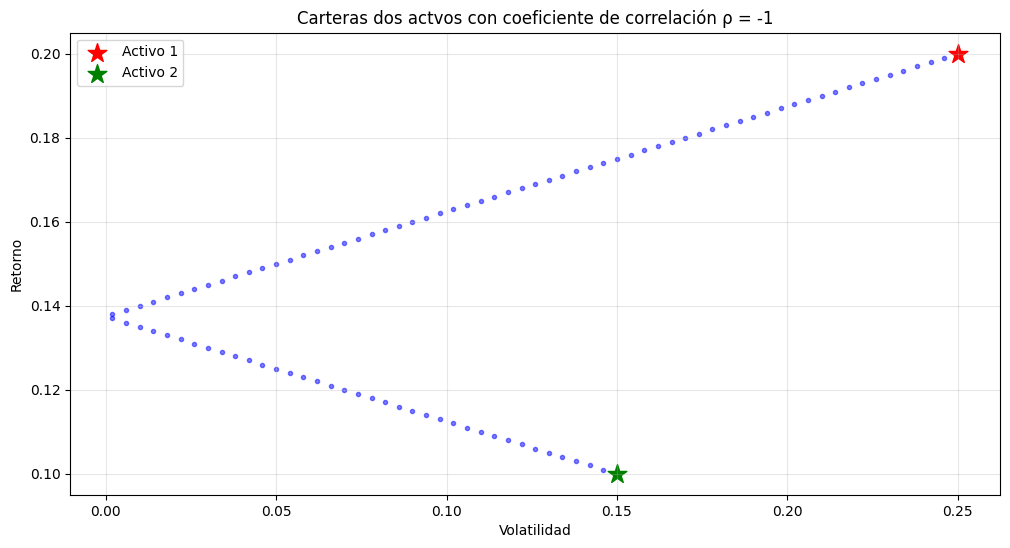

In [ ]:
pesos = np.linspace(
    0, 1, 101
)  # generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1



fig, ax = plt.subplots(figsize=(12, 6))



for w in pesos:
    retw = calc_ret_cartera(
        w, 1 - w, ret1, ret2
    )  # calculamos el retorno de la cartera para cada peso
    stdw = calc_std_cartera(
        w, 1 - w, std1, std2, coef_corr_neg
    )  # calculamos la volatilidad de la cartera para cada peso

    plt.scatter(
            stdw, retw, color="blue", marker=".", alpha=0.5
        )  # marcamos el resto de puntos



plt.scatter(
    std1, ret1, color="red", marker="*", s=200, label="Activo 1"
)  # marcamos el punto del activo 1
plt.scatter(
    std2, ret2, color="green", marker="*", s=200, label="Activo 2"
)  # marcamos el punto del activo 2



plt.xlabel("Volatilidad")
plt.ylabel("Retorno")
plt.title("Carteras dos actvos con coeficiente de correlación \u03C1 = -1")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

---

### Caso 3:
$ -1 \le \rho_{12} \le 1 $


* Si $-1 \leq \rho_{12} \leq 1$ se dice que los activos tienen correlación **lineal no perfecta**.

    - Hay beneficios de diversificación, a mayor correlación negativa mayor beneficio.
        

In [ ]:
x = np.linspace(0, 1, 101)
coef_corr_lst = [-1, -0.8, -0.5, 0, 0.5, 1]

# Definir un mapa de colores basado en coef_corr_lst
# colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#f0f921'] # con amarillos
colors = ["#440154", "#3b528b", "#21918c", "#5ec962", "#3366CC", "#FF6633"]

# Ajustar el tamaño de la
layout_width = 1200  # Ancho en píxeles
layout_height = 700  # Altura en píxeles

# Crear la figura de plotly
fig = go.Figure()

for idx, coef_corr_i in enumerate(coef_corr_lst):
    ret_lst = []
    std_lst = []

    for i in x:
        reti = calc_ret_cartera(i, 1 - i, ret1, ret2)
        stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_i)

        ret_lst.append(reti)
        std_lst.append(stdi)

    fig.add_trace(
        go.Scatter(
            x=std_lst,
            y=ret_lst,
            mode="markers",
            name=f"Corr {coef_corr_i}",
            marker=dict(color=colors[idx], size=8, opacity=0.5),
        )
    )

# Añadir puntos de activos individuales
fig.add_trace(
    go.Scatter(
        x=[std1],
        y=[ret1],
        mode="markers",
        marker=dict(color="red", size=20, symbol="star"),
        name="Activo 1",
    )
)
fig.add_trace(
    go.Scatter(
        x=[std2],
        y=[ret2],
        mode="markers",
        marker=dict(color="green", size=20, symbol="star"),
        name="Activo 2",
    )
)

# Configurar títulos y etiquetas

title_font_size = 20  # Tamaño de fuente del título

fig.update_layout(
    title="Cartera de dos activos variando el coeficiente de correlación",
    font=dict(size=title_font_size),
    title_x=0.5,
    # xanchor='center',
    xaxis_title="Volatilidad",
    yaxis_title="Retorno",
)

# Mostrar el gráfico
fig.show()

---